# Nguyen Van Minh - 22003405 - Midterm

- (2 điểm) Đọc dữ liệu vào DataFrame và hiển thị 5 dòng đầu, 5 dòng ngẫu nhiên, kích thước DataFrame.
- (2 điểm) Thống kê số lượng điện thoại bán ra theo từng hãng (HangDT) và vẽ biểu đồ cột.
- (2 điểm) Tính giá bán trung bình (GiaBan) theo từng loại (LoaiDT).
- (2 điểm) Lọc ra những điện thoại có dung lượng bộ nhớ trong (BoNhoTrong) lớn hơn 128GB và hiển thị.
- (2 điểm) Vẽ biểu đồ pie thể hiện tỷ lệ điện thoại bán ra theo từng loại (LoaiDT).


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t

In [40]:
df = pd.read_csv('smartphone_store.csv')
print(df.head(5))
print(df.sample(5))
print(df.shape)

    MaDT   HangDT  GiaBan  BoNhoTrong   Pin  NamSanXuat     LoaiDT  SoLuongBan
0  DT001    Apple      25         128  3110        2021   Flagship         150
1  DT002  Samsung      18         256  4000        2020   Flagship         120
2  DT003   Xiaomi      10         128  4500        2022  Tầm trung         200
3  DT004    Apple      30         256  3200        2023   Flagship         100
4  DT005     Oppo      15         128  5000        2021  Tầm trung         180
    MaDT   HangDT  GiaBan  BoNhoTrong   Pin  NamSanXuat     LoaiDT  SoLuongBan
1  DT002  Samsung      18         256  4000        2020   Flagship         120
5  DT006  Samsung      12          64  4500        2022  Tầm trung         220
4  DT005     Oppo      15         128  5000        2021  Tầm trung         180
7  DT008   Xiaomi       8          64  4000        2023     Giá rẻ         300
6  DT007     Vivo       9         128  5000        2019     Giá rẻ         250
(10, 8)


HangDT
Apple      3
Samsung    3
Xiaomi     2
Oppo       1
Vivo       1
Name: count, dtype: int64


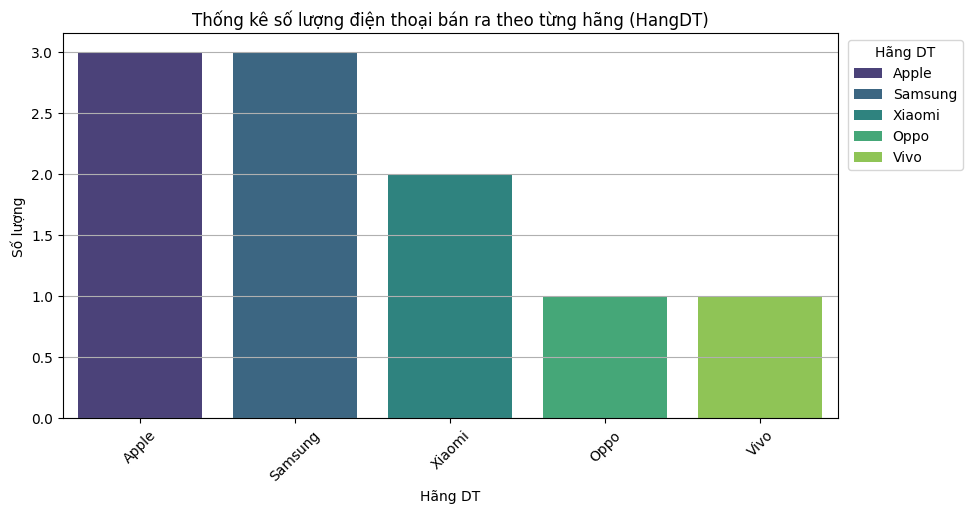

In [41]:
soluong_dienthoai_theo_hang = df['HangDT'].value_counts()
print(soluong_dienthoai_theo_hang)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=soluong_dienthoai_theo_hang.index,
    y=soluong_dienthoai_theo_hang.values,
    hue=soluong_dienthoai_theo_hang.index,
    palette="viridis",
    legend=True
)

plt.xlabel("Hãng DT")
plt.ylabel("Số lượng")
plt.title("Thống kê số lượng điện thoại bán ra theo từng hãng (HangDT)")
plt.legend(title="Hãng DT", bbox_to_anchor=(1.17, 1), loc='upper right')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [42]:
df.groupby('HangDT')['GiaBan'].mean()

HangDT
Apple      30.000000
Oppo       15.000000
Samsung    17.333333
Vivo        9.000000
Xiaomi      9.000000
Name: GiaBan, dtype: float64

In [43]:
df[df['BoNhoTrong'] > 128]

,MaDT,HangDT,GiaBan,BoNhoTrong,Pin,NamSanXuat,LoaiDT,SoLuongBan
1,DT002,Samsung,18,256,4000,2020,Flagship,120
3,DT004,Apple,30,256,3200,2023,Flagship,100
8,DT009,Apple,35,512,3300,2023,Flagship,90
9,DT010,Samsung,22,512,5000,2022,Flagship,110


LoaiDT
Flagship     570
Giá rẻ       550
Tầm trung    600
Name: SoLuongBan, dtype: int64


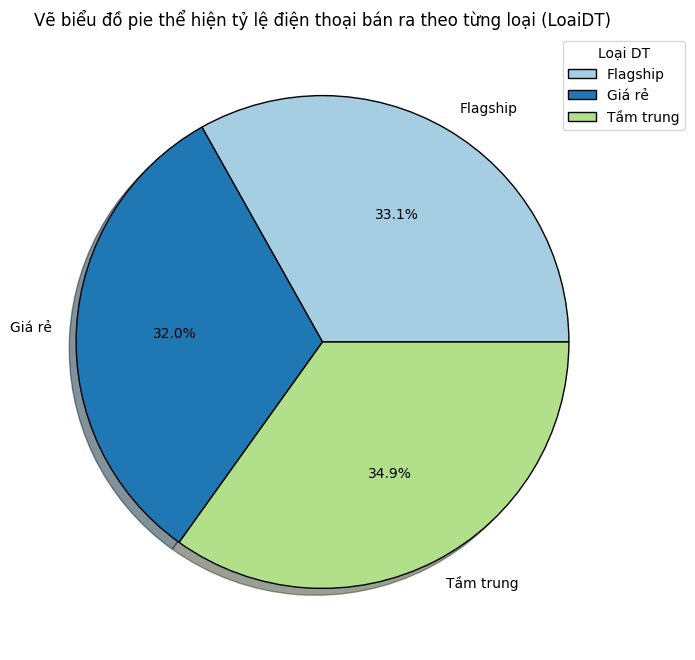

In [44]:
ratio_loaiDT = df.groupby('LoaiDT')['SoLuongBan'].sum()
print(ratio_loaiDT)
plt.figure(figsize=(8,8))

plt.pie(
    x=ratio_loaiDT,
    labels=ratio_loaiDT.index,
    autopct='%1.1f%%',
    colors=plt.cm.Paired.colors,
    # startangle=140,
    shadow=True,
    wedgeprops={'edgecolor': 'black'}
)

plt.legend(title="Loại DT", bbox_to_anchor=(1.1, 1), loc="upper right")
plt.title("Vẽ biểu đồ pie thể hiện tỷ lệ điện thoại bán ra theo từng loại (LoaiDT)")
plt.show()